# Importações

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Algumas perguntas a serem feitas:

-`1. Existe diferença na ocorrência de ataques cardíacos entre homens e mulheres? Além disso, existe diferença na faixa etária?`

-`2. Existe uma relação entre o índice de massa corporal (IMC) e a probabilidade de um ataque cardíaco?`

-`3. Quais são as características demográficas mais comuns entre os pacientes que tiveram um ataque cardíaco (idade, sexo, região, etc.)?`

-`4. Quem faz atividade física tem menos casos de ataque cardíaco`

-`5. Qual é o impacto do histórico familiar na ocorrência de ataques cardíacos?`

-`6. Qual é a distribuição de níveis de colesterol entre os pacientes com e sem ataques cardíacos?`

-`7. Quais variáveis (idade, pressão arterial, colesterol, etc.) têm maior correlação com a ocorrência de ataques cardíacos?`

-`8. Consigo construir um modelo para prever se o paciente terá ou não ataque do coração?`


In [ ]:
df = pd.read_csv("dataset/heart_attack_russia_youth_vs_adult.csv")

# Como estão meus dados ? 

In [ ]:
df.head()

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,1,50,Male,Rural,110.0,196.5,15.9,76,High,False,...,Low,Low,Primary,Married,Rural,False,5,2.3,5,False
1,2,40,Female,Urban,138.8,157.5,27.1,82,Moderate,False,...,Low,Moderate,Higher,Married,Urban,False,1,5.0,4,False
2,3,26,Male,Rural,116.0,210.1,27.2,71,Moderate,False,...,Middle,High,Primary,Married,Urban,False,4,2.4,8,False
3,4,54,Female,Rural,133.5,170.5,26.0,74,Moderate,True,...,Middle,Moderate,Higher,Married,Urban,False,2,2.7,6,True
4,5,19,Female,Urban,108.0,224.5,27.5,67,Low,False,...,Middle,Low,Higher,Widowed,Urban,False,4,3.5,4,True


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50000 non-null  int64  
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Region                 50000 non-null  object 
 4   Blood_Pressure         50000 non-null  float64
 5   Cholesterol            50000 non-null  float64
 6   BMI                    50000 non-null  float64
 7   Heart_Rate             50000 non-null  int64  
 8   Exercise_Level         50000 non-null  object 
 9   Smoking                50000 non-null  bool   
 10  Alcohol_Consumption    24976 non-null  object 
 11  Diabetes               50000 non-null  bool   
 12  Family_History         50000 non-null  bool   
 13  Stress_Level           50000 non-null  int64  
 14  Heart_Attack           50000 non-null  bool   
 15  An

In [42]:
df.describe(include='all')

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
count,50000.000000,50000.000000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000,50000,...,50000,50000,50000,50000,50000,50000,50000.000000,50000.000000,50000.00000,50000
unique,NaN,NaN,3,3,NaN,NaN,NaN,NaN,3,2,...,3,3,3,4,2,2,NaN,NaN,NaN,2
top,NaN,NaN,Female,Urban,NaN,NaN,NaN,NaN,Moderate,False,...,Middle,Moderate,Secondary,Married,Urban,False,NaN,NaN,NaN,False
freq,NaN,NaN,24155,25034,NaN,NaN,NaN,NaN,24946,35008,...,20025,24828,20064,25099,30142,39963,NaN,NaN,NaN,39935
mean,25000.500000,35.991820,NaN,NaN,120.058636,199.852762,24.983912,79.988980,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.007100,2.997782,5.48674,NaN
std,14433.901067,14.110139,NaN,NaN,14.975835,49.998331,5.003784,11.804567,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.410351,1.149608,2.86076,NaN
min,1.000000,12.000000,NaN,NaN,60.000000,-18.700000,2.900000,60.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.00000,NaN
25%,12500.750000,24.000000,NaN,NaN,109.900000,166.100000,21.600000,70.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,3.00000,NaN
50%,25000.500000,36.000000,NaN,NaN,120.050000,199.900000,25.000000,80.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,5.00000,NaN
75%,37500.250000,48.000000,NaN,NaN,130.200000,233.500000,28.400000,90.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,8.00000,NaN


In [8]:
df.columns

Index(['ID', 'Age', 'Gender', 'Region', 'Blood_Pressure', 'Cholesterol', 'BMI',
       'Heart_Rate', 'Exercise_Level', 'Smoking', 'Alcohol_Consumption',
       'Diabetes', 'Family_History', 'Stress_Level', 'Heart_Attack', 'Angina',
       'Heart_Disease_History', 'Diet', 'Sleep_Hours', 'Occupation',
       'Income_Level', 'Physical_Activity', 'Education_Level',
       'Marital_Status', 'Urban_Rural', 'Medication', 'Health_Awareness',
       'Daily_Water_Intake', 'Mental_Health', 'Obesity'],
      dtype='object')

In [43]:
df[['Urban_Rural','Region']]

,Urban_Rural,Region
0,Rural,Rural
1,Urban,Urban
2,Urban,Rural
3,Urban,Rural
4,Urban,Urban
...,...,...
49995,Urban,Rural
49996,Urban,Rural
49997,Urban,Suburban
49998,Urban,Rural


In [52]:
df['Region'].value_counts()

Region
Urban       25034
Rural       14946
Suburban    10020
Name: count, dtype: int64

In [53]:
df['Urban_Rural'].value_counts()

Urban_Rural
Urban    30142
Rural    19858
Name: count, dtype: int64

In [54]:
df.isnull().sum()

ID                           0
Age                          0
Gender                       0
Region                       0
Blood_Pressure               0
Cholesterol                  0
BMI                          0
Heart_Rate                   0
Exercise_Level               0
Smoking                      0
Alcohol_Consumption      25024
Diabetes                     0
Family_History               0
Stress_Level                 0
Heart_Attack                 0
Angina                       0
Heart_Disease_History        0
Diet                         0
Sleep_Hours                  0
Occupation                   0
Income_Level                 0
Physical_Activity            0
Education_Level              0
Marital_Status               0
Urban_Rural                  0
Medication                   0
Health_Awareness             0
Daily_Water_Intake           0
Mental_Health                0
Obesity                      0
dtype: int64

In [57]:
df[df.duplicated()]

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity


## Comentários breves:

### Aparentemente não há muitos problemas nos dados, tem uma coluna que não é específicado o que é `Urban_Rural` e tem a `Region`.  A única coluna com valores nulos é para consumo de álcool (`Alcohol_Consumption`). Existe dois pacientes com valores negativos no colesterol.

# 1. Existe diferença na ocorrência de ataques cardíacos entre homens e mulheres? Além disso, existe diferença na faixa etária?

### Objetivos:
- Exibir a ocorrência de casos para homens e para mulheres

Gender
Female    24155
Male      23944
Other      1901
Name: count, dtype: int64

In [ ]:
# Agrupando pelo gênero e somando a quantidade de pessoas que tiveram caso
df_heart_atck_by_gender = df.groupby('Gender')['Heart_Attack'].sum()

<Axes: xlabel='Gender', ylabel='Heart_Attack'>

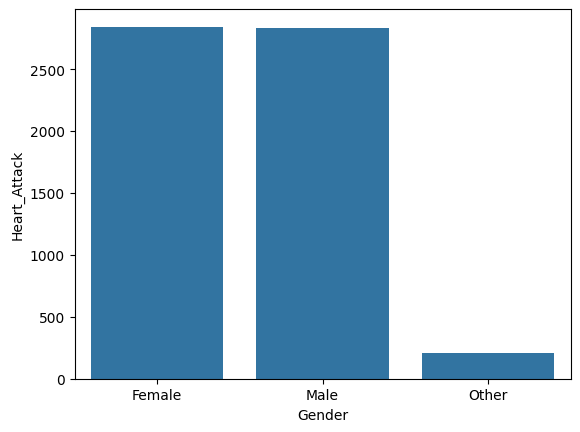

In [70]:
sns.barplot(df_heart_atck_by_gender)

In [ ]:
df_occurrences_by_age_and_gender = df[(df['Heart_Attack']) & (df['Gender']!='Other')].groupby(['Age','Gender'])['Heart_Attack'].sum().reset_index()

df_occurrences_by_age_and_gender


,Age,Gender,Heart_Attack
0,12,Female,65
1,12,Male,50
2,13,Female,57
3,13,Male,53
4,14,Female,53
...,...,...,...
93,58,Male,74
94,59,Female,57
95,59,Male,72
96,60,Female,62


In [122]:
print(sns.palettes.SEABORN_PALETTES)

{'deep': ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3', '#937860', '#DA8BC3', '#8C8C8C', '#CCB974', '#64B5CD'], 'deep6': ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD'], 'muted': ['#4878D0', '#EE854A', '#6ACC64', '#D65F5F', '#956CB4', '#8C613C', '#DC7EC0', '#797979', '#D5BB67', '#82C6E2'], 'muted6': ['#4878D0', '#6ACC64', '#D65F5F', '#956CB4', '#D5BB67', '#82C6E2'], 'pastel': ['#A1C9F4', '#FFB482', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#DEBB9B', '#FAB0E4', '#CFCFCF', '#FFFEA3', '#B9F2F0'], 'pastel6': ['#A1C9F4', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#FFFEA3', '#B9F2F0'], 'bright': ['#023EFF', '#FF7C00', '#1AC938', '#E8000B', '#8B2BE2', '#9F4800', '#F14CC1', '#A3A3A3', '#FFC400', '#00D7FF'], 'bright6': ['#023EFF', '#1AC938', '#E8000B', '#8B2BE2', '#FFC400', '#00D7FF'], 'dark': ['#001C7F', '#B1400D', '#12711C', '#8C0800', '#591E71', '#592F0D', '#A23582', '#3C3C3C', '#B8850A', '#006374'], 'dark6': ['#001C7F', '#12711C', '#8C0800', '#591E71', '#B8850A', '#006374'], 'col

<Axes: xlabel='Age', ylabel='Heart_Attack'>

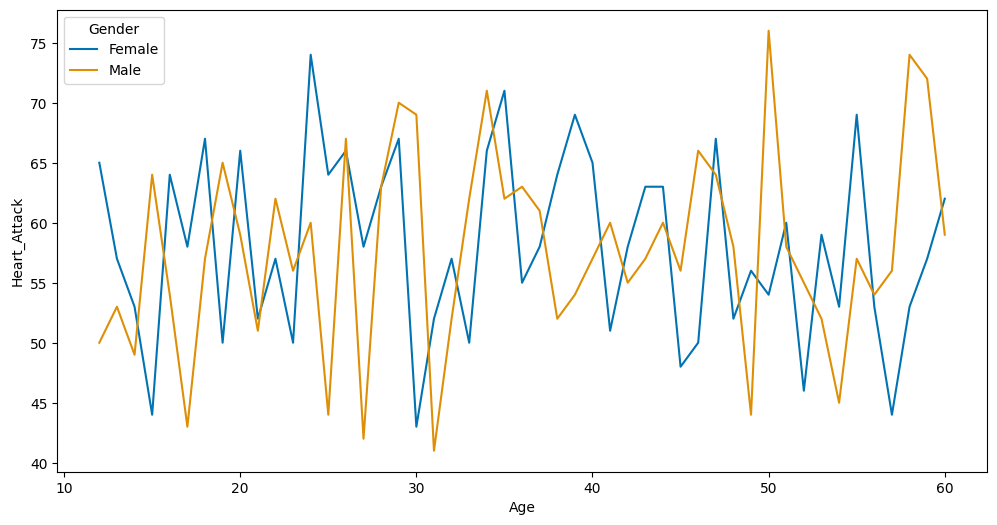

In [126]:
sns.set_palette("colorblind")
plt.figure(figsize=(12, 6))
sns.lineplot(y='Heart_Attack',x='Age',hue='Gender',data=df_occurrences_by_age_and_gender)

In [77]:
df[(df['Heart_Attack']) & (df['Gender']=='Female')][['Gender','Age']]

,Gender,Age
15,Female,14
31,Female,53
36,Female,55
41,Female,20
53,Female,18
...,...,...
49966,Female,52
49974,Female,41
49978,Female,53
49982,Female,24


In [72]:
sns.grp

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,1,50,Male,Rural,110.0,196.5,15.9,76,High,False,...,Low,Low,Primary,Married,Rural,False,5,2.3,5,False
1,2,40,Female,Urban,138.8,157.5,27.1,82,Moderate,False,...,Low,Moderate,Higher,Married,Urban,False,1,5.0,4,False
2,3,26,Male,Rural,116.0,210.1,27.2,71,Moderate,False,...,Middle,High,Primary,Married,Urban,False,4,2.4,8,False
3,4,54,Female,Rural,133.5,170.5,26.0,74,Moderate,True,...,Middle,Moderate,Higher,Married,Urban,False,2,2.7,6,True
4,5,19,Female,Urban,108.0,224.5,27.5,67,Low,False,...,Middle,Low,Higher,Widowed,Urban,False,4,3.5,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,56,Other,Rural,87.7,256.8,25.3,71,Low,True,...,Middle,High,Primary,Divorced,Urban,True,4,4.9,1,False
49996,49997,16,Male,Rural,125.2,102.9,25.1,77,Moderate,True,...,Middle,High,Secondary,Single,Urban,False,3,4.4,4,True
49997,49998,46,Female,Suburban,116.2,160.6,27.7,63,Low,True,...,Middle,Low,Secondary,Single,Urban,False,2,2.4,7,False
49998,49999,24,Female,Rural,104.6,180.4,29.2,60,Moderate,True,...,Low,Moderate,Primary,Widowed,Urban,False,3,3.1,5,False


In [59]:
df.columns

Index(['ID', 'Age', 'Gender', 'Region', 'Blood_Pressure', 'Cholesterol', 'BMI',
       'Heart_Rate', 'Exercise_Level', 'Smoking', 'Alcohol_Consumption',
       'Diabetes', 'Family_History', 'Stress_Level', 'Heart_Attack', 'Angina',
       'Heart_Disease_History', 'Diet', 'Sleep_Hours', 'Occupation',
       'Income_Level', 'Physical_Activity', 'Education_Level',
       'Marital_Status', 'Urban_Rural', 'Medication', 'Health_Awareness',
       'Daily_Water_Intake', 'Mental_Health', 'Obesity'],
      dtype='object')